# Introduction Azure ML
<br>

<img src='https://github.com/retkowsky/images/blob/master/AzureMLservicebanniere.png?raw=true'>


> Documentation : https://docs.microsoft.com/en-us/azure/machine-learning/

## 0. Paramétrage

In [1]:
import sys
sys.version

'3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) \n[GCC 7.3.0]'

In [2]:
import datetime
now = datetime.datetime.now()
print(now)

2020-02-14 08:46:11.671621


In [3]:
import azureml.core
from azureml.core import Experiment, Workspace

# Check core SDK version number
print("Version Azure ML service : ", azureml.core.VERSION)

Version Azure ML service :  1.0.83


In [4]:
# Rappel des infos du workspace Azure ML service
ws = Workspace.from_config()
print('Workspace name: ' + ws.name, 
      'Azure region: ' + ws.location, 
      'Resource group: ' + ws.resource_group, sep='\n')

Workspace name: workshop-aml-2020
Azure region: westeurope
Resource group: workshopaml2020RG


## 1. Chargement des données

In [5]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

In [6]:
X, y = load_diabetes(return_X_y = True)
columns = ['age', 'gender', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
# Partitionnement des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

data = {
    "train":{"X": X_train, "y": y_train},        
    "test":{"X": X_test, "y": y_test}
}

In [8]:
print ("Training =", len(data['train']['X']), 'observations')

Training = 353 observations


In [9]:
print ("Test =", len(data['test']['X']), 'observations')

Test = 89 observations


## 2. Modélisation

Nous allons réaliser un modèle de régression **Ridge**.<br> 
<img src='https://github.com/retkowsky/images/blob/master/ridge.png?raw=true'>
<br>
C'est une version régularisée de la régression linéaire.
Cela permet d'ajuster les données avec des coefficents de pondération du modèle les plus petits possibles.
- Si le paramétre = 0 => nous avons dans ce cas une régression linéaire.
- Si le paramétre a une valeur importante, alors les coefficients de pondérations ont des valeurs proches de 0 => on aura dans ce cas une ligne horizontale qui passe par la moyenne des données.



In [10]:
experiment = Experiment(workspace=ws, name="workshop1-IntroductionAMLS")

Les étapes
1. Logs d'informations
2. Modélisation
3. Logs de résultats de modèles
4. Sauvegarde modèle

In [11]:
def regridge(alpha):
    
    from datetime import datetime
    maintenant = datetime.now()
    print("Maintenant : ", maintenant)

    # 1. Run
    run = experiment.start_logging()
    print('Alpha = ', alpha)
    
    # 2. Logs de valeurs
    run.log('alpha', alpha)
    run.log('date_log', str(maintenant))

    # 3. Modèle ML
    regression_model = Ridge(alpha=alpha)
    regression_model.fit(data['train']['X'], data['train']['y'])
    preds = regression_model.predict(data['test']['X'])

    # 4. Log des métriques
    print('MSE =', mean_squared_error(data['test']['y'], preds))
    run.log('mse', mean_squared_error(data['test']['y'], preds))

    # 5. Export modèle
    joblib.dump(value=regression_model, filename='modelenotebook1.pkl')

    # 6. Ajout de tags au run
    run.tag("Langage", "Python")
    run.tag("Version_Python", "3.6.9")
    run.tag("Version_AMLS", "1.0.74")
    run.tag("Team", "DataScience")
    run.tag("Pays", "France") 
    run.tag("Auteur", "Serge") 
    
    # 6. Fin
    run.complete()

Rappel: Définition MSE
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e">

In [12]:
regridge(0.1)

Maintenant :  2020-02-14 08:46:19.292536
Alpha =  0.1
MSE = 3372.649627810032


In [13]:
regridge(0.2)

Maintenant :  2020-02-14 08:46:28.789396
Alpha =  0.2
MSE = 3325.2946794678764


In [14]:
regridge(0.3)

Maintenant :  2020-02-14 08:46:34.726073
Alpha =  0.3
MSE = 3302.6736334017255


In [15]:
# On regarde si on a bien téléchargé le pickle du modèle
%ls modelenotebook1.pkl -l

-rwxrwxrwx 1 root root 645 Feb 14 08:46 modelenotebook1.pkl*


> Nous pouvons visualiser les résultats sur le portail dans la section **experiments**

## 3. Utilisation MLFlow

<img src="https://docs.microsoft.com/en-us/azure/machine-learning/service/media/how-to-use-mlflow/mlflow-diagram-track.png">

Documentation: https://docs.microsoft.com/en-us/azure/machine-learning/service/how-to-use-mlflow

> https://mlflow.org/

In [16]:
import mlflow
import mlflow.sklearn
import azureml.core
from azureml.core import Workspace
import matplotlib.pyplot as plt

In [17]:
#pip install azureml-mlflow

In [18]:
ws = Workspace.from_config()

mlflow.set_tracking_uri(ws.get_mlflow_tracking_uri())

experiment_name = "Workshop1-MLFlow"
mlflow.set_experiment(experiment_name)

INFO: 'Workshop1-MLFlow' does not exist. Creating a new experiment


Data contains 353 training samples and 89 test samples
Mean Squared Error is 3295.741064355809


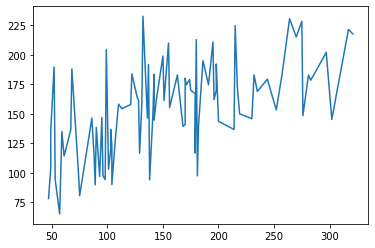

In [19]:
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y = True)
columns = ['age', 'gender', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
data = {
    "train":{"X": X_train, "y": y_train},        
    "test":{"X": X_test, "y": y_test}
}

print ("Data contains", len(data['train']['X']), "training samples and",len(data['test']['X']), "test samples")

model_save_path = "model"

with mlflow.start_run() as run:
    # Log the algorithm parameter alpha to the run
    mlflow.log_metric('alpha', 0.4)
    # Create, fit, and test the scikit-learn Ridge regression model
    regression_model = Ridge(alpha=0.4)
    regression_model.fit(data['train']['X'], data['train']['y'])
    preds = regression_model.predict(data['test']['X'])

    # Log mean squared error
    print('Mean Squared Error is', mean_squared_error(data['test']['y'], preds))
    mlflow.log_metric('mse', mean_squared_error(data['test']['y'], preds))
    
    # Save the model to the outputs directory for capture
    mlflow.sklearn.log_model(regression_model,model_save_path)
    
    # Plot actuals vs predictions and save the plot within the run
    fig = plt.figure(1)
    idx = np.argsort(data['test']['y'])
    plt.plot(data['test']['y'][idx],preds[idx])
    fig.savefig("actuals_vs_predictions.png")
    mlflow.log_artifact("actuals_vs_predictions.png")
    

In [20]:
ws.experiments[experiment_name]

Name,Workspace,Report Page,Docs Page
Workshop1-MLFlow,workshop-aml-2020,Link to Azure Machine Learning studio,Link to Documentation


## 4. Azure Open Datasets

> https://azure.microsoft.com/fr-fr/services/open-datasets/

In [21]:
#!pip install azureml-opendatasets

In [22]:
from azureml.opendatasets import NoaaIsdWeather

from datetime import datetime
from dateutil import parser
from dateutil.relativedelta import relativedelta

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/multimethods/__init__.py:106: DeprecationWarning: inspect.getargspec() is deprecated since Python 3.0, use inspect.signature() or inspect.getfullargspec()
  dispatcher.typemap.append((self.types, self.condition, function, inspect.getargspec(function)))


In [23]:
start_date = parser.parse('2020-1-1')
end_date = parser.parse('2020-2-1')
isd = NoaaIsdWeather(start_date, end_date)
isd.to_pandas_dataframe().info()
print('isd done')

Target paths: ['/year=2020/month=1/', '/year=2020/month=2/']
Looking for parquet files...
Reading them into Pandas dataframe...
Reading ISDWeather/year=2020/month=1/part-00000-tid-3573281813092531386-34a2a8c6-dbf5-4d4b-9280-01a7475083ea-1903-1.c000.snappy.parquet under container isdweatherdatacontainer
Reading ISDWeather/year=2020/month=1/part-00001-tid-3573281813092531386-34a2a8c6-dbf5-4d4b-9280-01a7475083ea-1901-1.c000.snappy.parquet under container isdweatherdatacontainer
Reading ISDWeather/year=2020/month=1/part-00002-tid-3573281813092531386-34a2a8c6-dbf5-4d4b-9280-01a7475083ea-1900-1.c000.snappy.parquet under container isdweatherdatacontainer
Reading ISDWeather/year=2020/month=1/part-00003-tid-3573281813092531386-34a2a8c6-dbf5-4d4b-9280-01a7475083ea-1902-1.c000.snappy.parquet under container isdweatherdatacontainer
Reading ISDWeather/year=2020/month=1/part-00004-tid-3573281813092531386-34a2a8c6-dbf5-4d4b-9280-01a7475083ea-1899-1.c000.snappy.parquet under container isdweatherdataco

In [24]:
isd.to_pandas_dataframe().head()

Target paths: ['/year=2020/month=1/', '/year=2020/month=2/']
Looking for parquet files...
Reading them into Pandas dataframe...
Reading ISDWeather/year=2020/month=1/part-00000-tid-3573281813092531386-34a2a8c6-dbf5-4d4b-9280-01a7475083ea-1903-1.c000.snappy.parquet under container isdweatherdatacontainer
Reading ISDWeather/year=2020/month=1/part-00001-tid-3573281813092531386-34a2a8c6-dbf5-4d4b-9280-01a7475083ea-1901-1.c000.snappy.parquet under container isdweatherdatacontainer
Reading ISDWeather/year=2020/month=1/part-00002-tid-3573281813092531386-34a2a8c6-dbf5-4d4b-9280-01a7475083ea-1900-1.c000.snappy.parquet under container isdweatherdatacontainer
Reading ISDWeather/year=2020/month=1/part-00003-tid-3573281813092531386-34a2a8c6-dbf5-4d4b-9280-01a7475083ea-1902-1.c000.snappy.parquet under container isdweatherdatacontainer
Reading ISDWeather/year=2020/month=1/part-00004-tid-3573281813092531386-34a2a8c6-dbf5-4d4b-9280-01a7475083ea-1899-1.c000.snappy.parquet under container isdweatherdataco

,usaf,wban,datetime,latitude,longitude,elevation,windAngle,windSpeed,temperature,seaLvlPressure,...,pastWeatherIndicator,precipTime,precipDepth,snowDepth,stationName,countryOrRegion,p_k,year,day,version
0,999999,04127,2020-01-26 10:45:00,43.204,-116.751,1204.0,NaN,NaN,0.9,NaN,...,NaN,NaN,NaN,NaN,MURPHY 10 W,US,999999-04127,2020,26,1.0
1,999999,04222,2020-01-24 07:50:00,40.651,-122.607,432.0,NaN,NaN,7.9,NaN,...,NaN,NaN,NaN,NaN,REDDING 12 WNW,US,999999-04222,2020,24,1.0
2,999999,12987,2020-01-04 05:30:00,26.526,-98.063,20.0,NaN,NaN,14.6,NaN,...,NaN,NaN,NaN,NaN,EDINBURG 17 NNE,US,999999-12987,2020,4,1.0
3,999999,04128,2020-01-08 10:55:00,43.471,-119.692,1397.0,NaN,NaN,0.9,NaN,...,NaN,NaN,NaN,NaN,RILEY 10 WSW,US,999999-04128,2020,8,1.0
4,999999,13301,2020-01-07 07:10:00,39.867,-93.147,254.0,NaN,NaN,0.5,NaN,...,NaN,NaN,NaN,NaN,CHILLICOTHE 22 ENE,US,999999-13301,2020,7,1.0


<img src="https://github.com/retkowsky/images/blob/master/Powered-by-MS-Azure-logo-v2.png?raw=true" height="300" width="300">